In [7]:
import pandas as pd

# Titanic datasetini oxumaq
df = pd.read_csv(r"C:\Users\murad\Downloads\titanic.csv")

# İlk 5 sətiri göstəririk
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [18]:
# NaN dəyərlərinin sayı
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [29]:
df = df.dropna()  # NaN dəyərlərini silir

In [32]:
df = df.fillna(df.select_dtypes(include=['number']).mean())

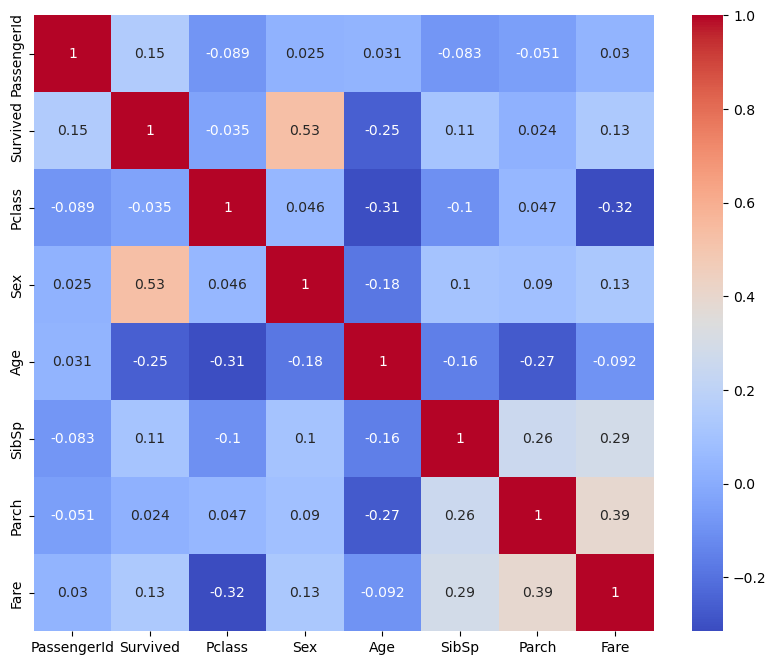

In [33]:
# Yalnız sayısal sütunları seçmək
numeric_df = df.select_dtypes(include=['number'])

# Sonra correlation matrix-i yenidən hesablaya bilərsiniz
correlation_matrix = numeric_df.corr()

# Heatmap ilə göstərmək
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\murad\Downloads\titanic.csv")

# İlk 5 sətirə baxaq
print(df.head())

# Dataset-in ümumi məlumatlarına baxaq
print(df.info())

# Sütun adlarını yoxlayaq
print("Sütunlar:", df.columns.tolist())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [40]:
# Boş dəyərləri yoxlayaq
print(df.isnull().sum())

# NaN dəyərləri olan sütunları faizlə göstərək
missing_values = df.isnull().sum() / len(df) * 100
print("Boş dəyərlərin faizi:\n", missing_values)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked_Q     0
Embarked_S     0
dtype: int64
Boş dəyərlərin faizi:
 PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked_Q     0.0
Embarked_S     0.0
dtype: float64


In [41]:
# Rəqəmsal sütunların statistik göstəriciləri
print(df.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   183.000000  183.000000  183.000000  183.000000  183.000000   
mean    455.366120    0.672131    1.191257    0.480874   35.674426   
std     247.052476    0.470725    0.515187    0.501005   15.643866   
min       2.000000    0.000000    1.000000    0.000000    0.920000   
25%     263.500000    0.000000    1.000000    0.000000   24.000000   
50%     457.000000    1.000000    1.000000    0.000000   36.000000   
75%     676.000000    1.000000    1.000000    1.000000   47.500000   
max     890.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  183.000000  183.000000  183.000000  
mean     0.464481    0.475410   78.682469  
std      0.644159    0.754617   76.347843  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000   29.700000  
50%      0.000000    0.000000   57.000000  
75%      1.000000    1.000000   90.000000  
max      3.000000

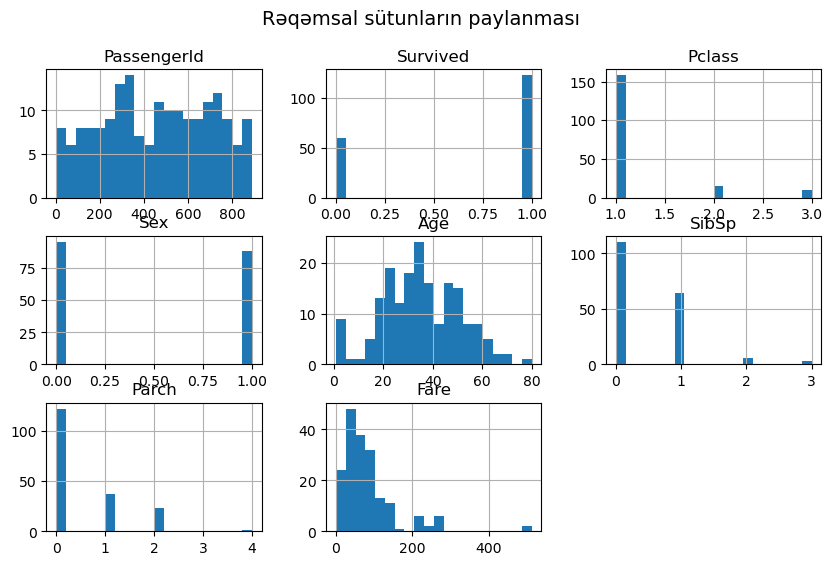

In [42]:
# Rəqəmsal sütunlar üçün histogramlar
df.select_dtypes(include=['number']).hist(figsize=(10, 6), bins=20)
plt.suptitle("Rəqəmsal sütunların paylanması", fontsize=14)
plt.show()


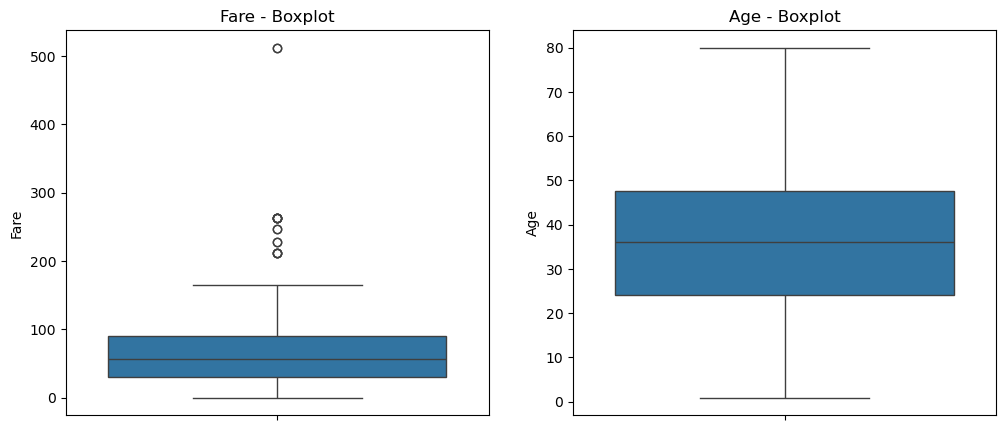

In [43]:
# Fare və Age sütunları üçün boxplot çəkək
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df['Fare'], ax=axes[0])
axes[0].set_title('Fare - Boxplot')

sns.boxplot(y=df['Age'], ax=axes[1])
axes[1].set_title('Age - Boxplot')

plt.show()


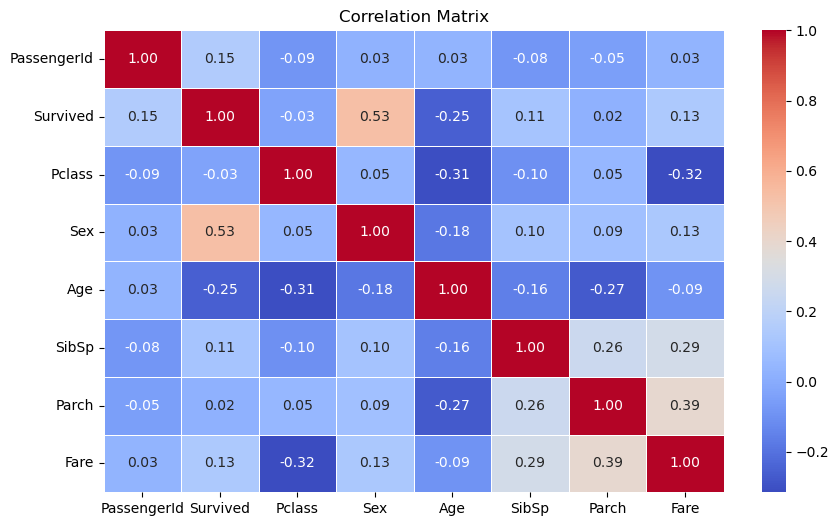

In [44]:
# Yalnız rəqəmsal sütunları seçərək korrelasiya hesablayırıq
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Korelasiya matrisini vizuallaşdıraq
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


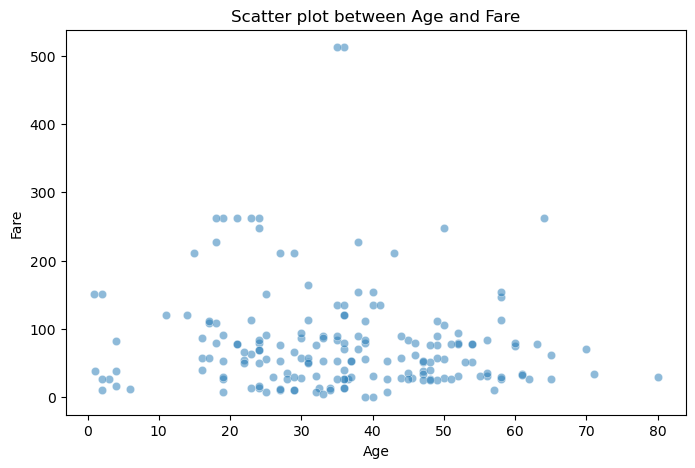

In [45]:
# Yaş (Age) və Qiymət (Fare) arasındakı əlaqəni göstərən scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', data=df, alpha=0.5)
plt.title('Scatter plot between Age and Fare')
plt.show()


##### artg

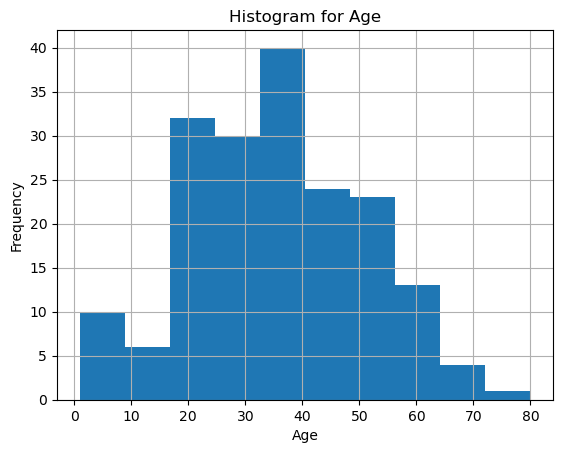

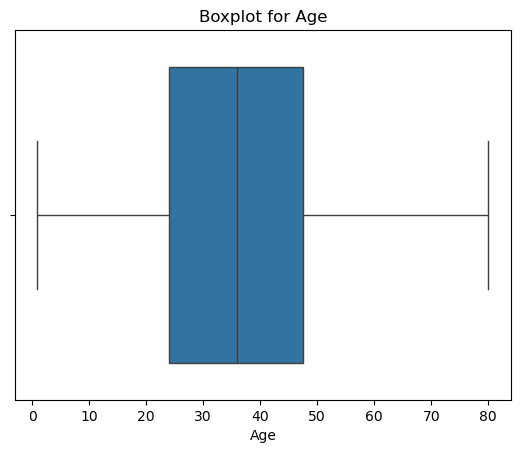

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age
df['Age'].hist()
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Age
sns.boxplot(x=df['Age'])
plt.title('Boxplot for Age')
plt.show()


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
df = pd.read_csv(r"C:\Users\murad\Downloads\titanic.csv")
print(df.head())  # İlk 5 sətri göstərir
print(df.info())  # Sütun məlumatları

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [53]:
print(df['Age'].isnull().sum())  # NaN dəyərlərin sayını göstərir

0


In [54]:
print(df['Age'].median())  # Medianın dəyərini göstərir

28.0


In [57]:
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].mean())


In [52]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


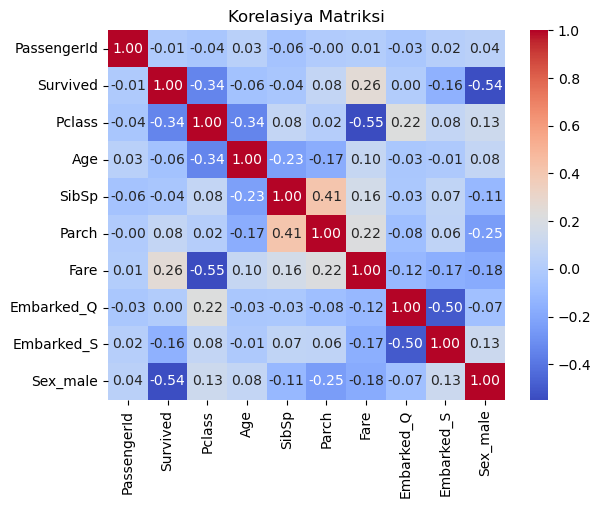

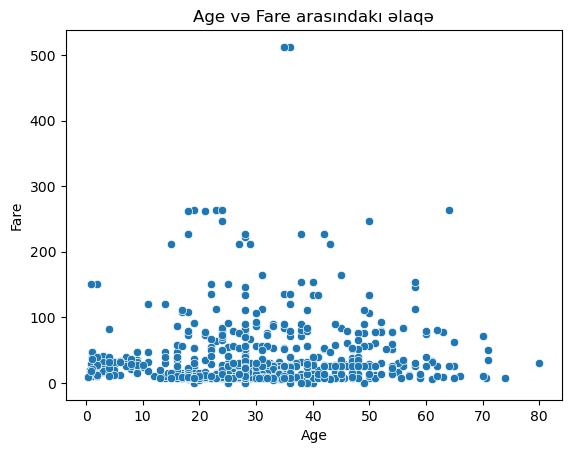

Accuracy: 0.8044692737430168
Confusion Matrix:
 [[89 16]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Verilənlər dəstini yükləyirik
data = pd.read_csv(r"C:\Users\murad\Downloads\titanic.csv")

# Datasetin ilk 5 sətrinə baxırıq
display(data.head())

# Sütunlardakı boş dəyərləri yoxlamaq
print(data.isnull().sum())

# "Embarked" və "Sex" kateqorik sütunlarını rəqəmsal formata çevirmək
data = pd.get_dummies(data, columns=['Embarked', 'Sex'], drop_first=True)

# "Age" və "Fare" sütunlarındakı boş dəyərləri median ilə doldurmaq
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# "Name", "Ticket", "Cabin" kimi faydasız sütunları silirik
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Korelasiya matrisini çəkirik
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasiya Matriksi')
plt.show()

# Scatter plot nümunəsi
sns.scatterplot(x='Age', y='Fare', data=data)
plt.title('Age və Fare arasındakı əlaqə')
plt.show()

# "Survived" sütunu ilə etiketləri ayırırıq
X = data.drop('Survived', axis=1)  # X - xüsusiyyətlər (features)
y = data['Survived']  # y - hədəf dəyişəni (target)

# Train-test bölməsini edirik
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Modelini qururuq
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Modeli test edirik
y_pred = model.predict(X_test)

# Modelin Qiymətləndirilməsi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))